# Decision Tree in classification

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [9]:
dataset = pd.read_csv(r"C:\Users\Bhakti Gajipara\Downloads\Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [10]:
dataset.drop(["User ID","Gender"],axis = 1,inplace = True)

In [11]:
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [13]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [14]:
x = dataset.iloc[:,:-1]
y = dataset["Purchased"]

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
ss = StandardScaler()
ss.fit(x)

StandardScaler()

In [17]:
x = pd.DataFrame(ss.transform(x),columns=x.columns)

In [18]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

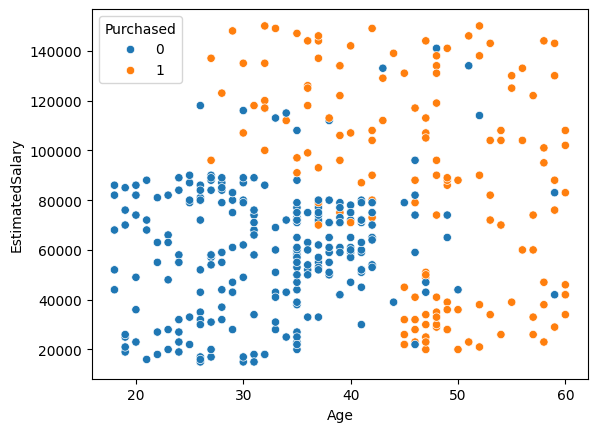

In [37]:
sns.scatterplot(x= "Age",y = "EstimatedSalary",data = dataset,hue = "Purchased")

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
df = DecisionTreeClassifier()
df.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [24]:
df.score(x_test,y_test)

0.8375

In [45]:
df.score(x_train,y_train)

0.996875

In [36]:
dt.score(x_test,y_test)

0.8375

In [27]:
df.predict([[19,76000]])

C:\Users\Bhakti Gajipara\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

C:\Users\Bhakti Gajipara\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

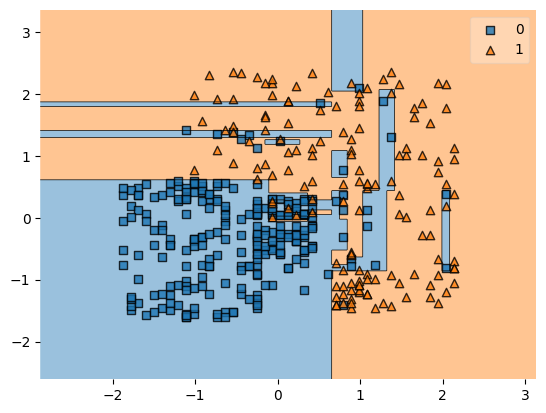

In [42]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=df)

C:\Users\Bhakti Gajipara\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

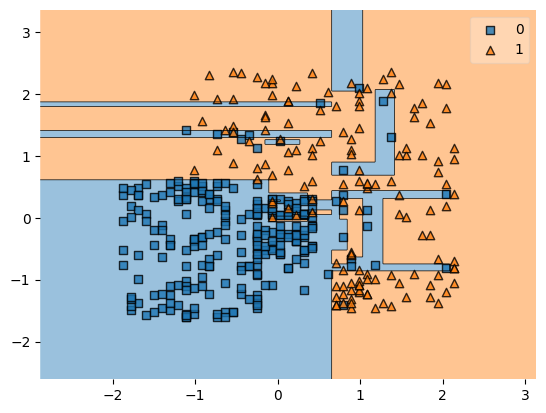

In [43]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)

In [28]:
from sklearn.tree import plot_tree

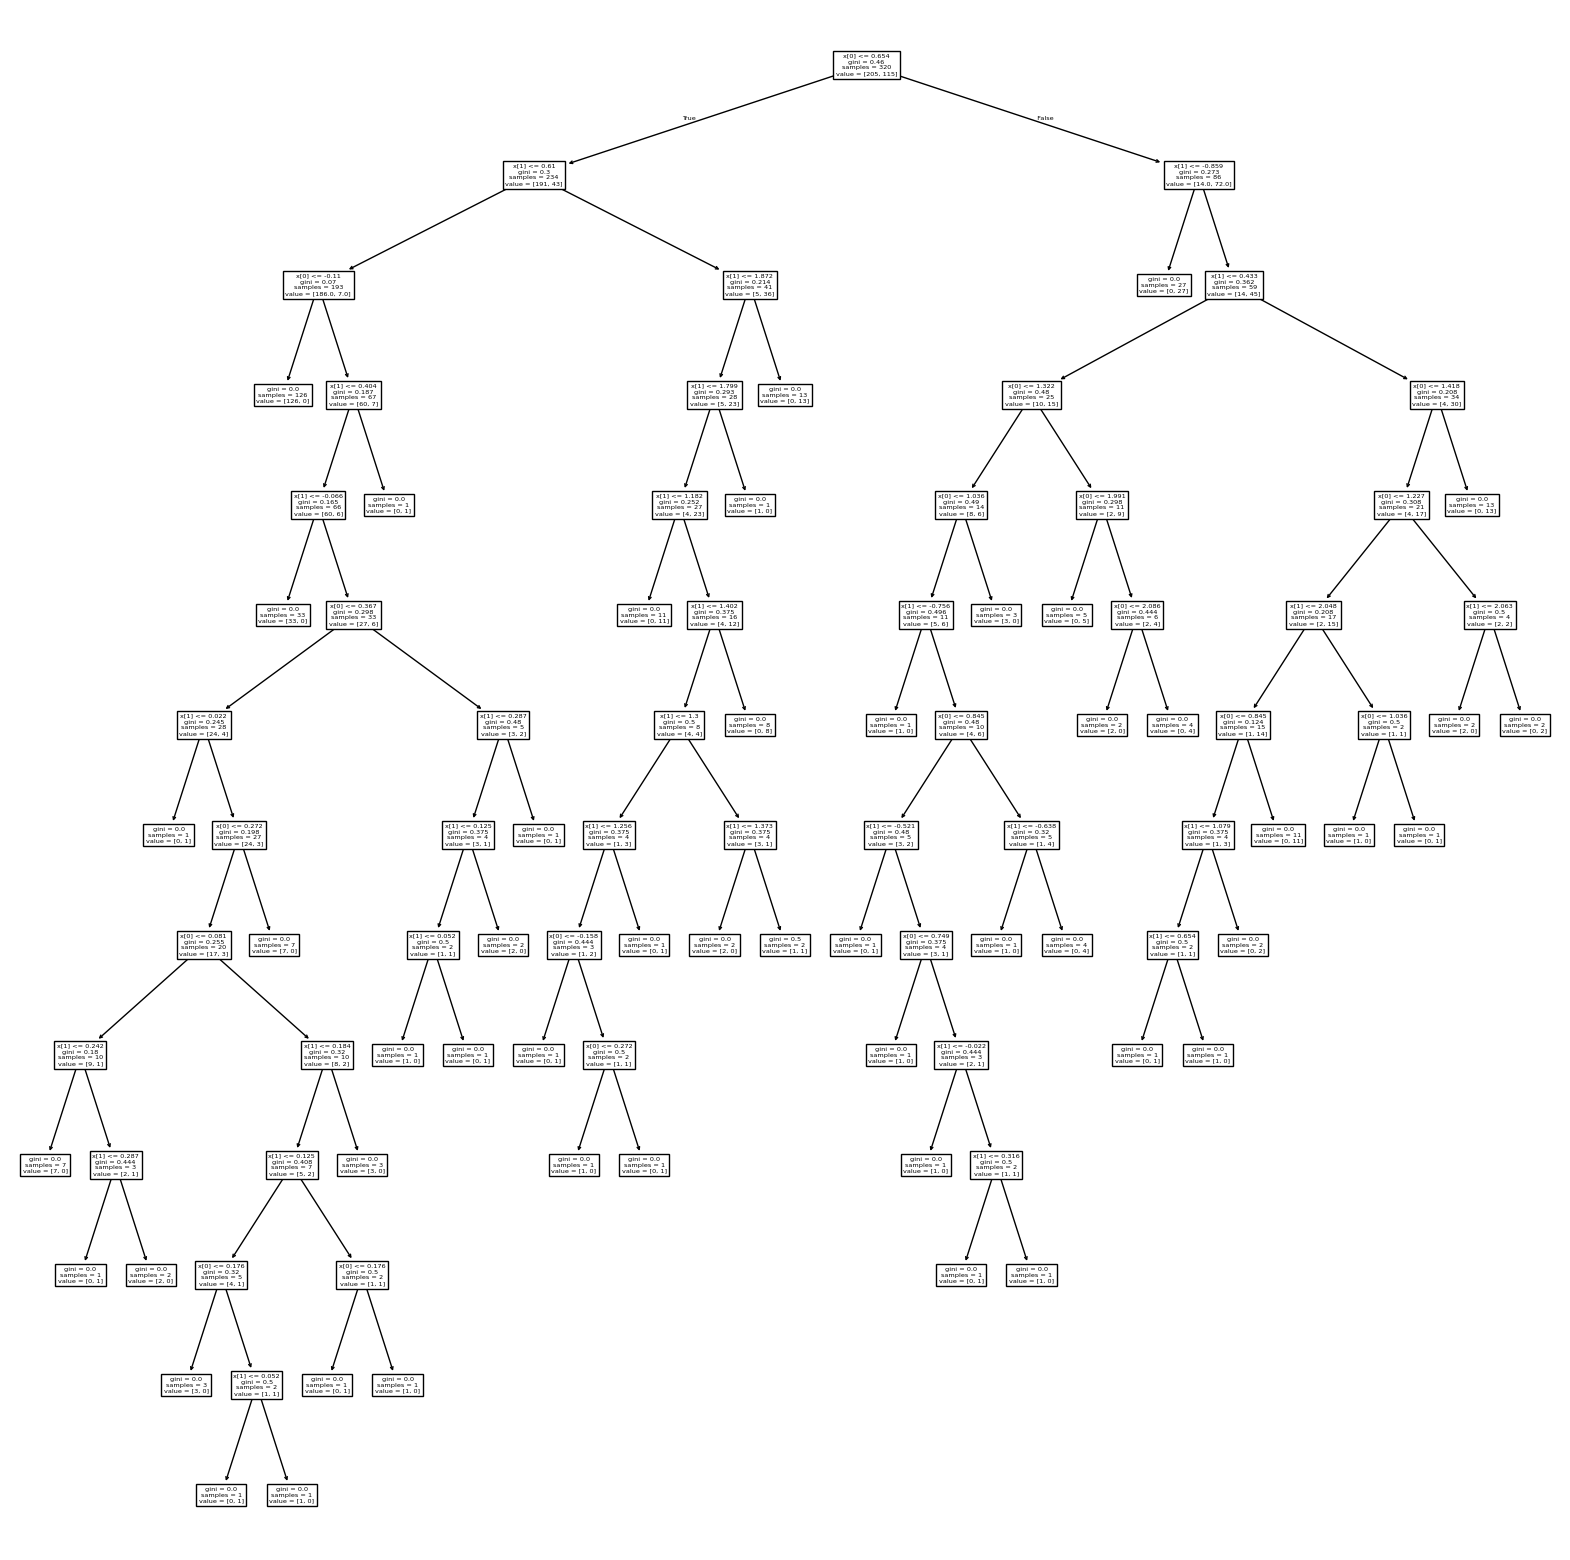

In [33]:
plt.figure(figsize=(20,20))
plot_tree(df)
plt.show()

In [48]:
df1 = DecisionTreeClassifier(max_depth=5)
df1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [49]:
df1.score(x_test,y_test)

0.9

C:\Users\Bhakti Gajipara\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

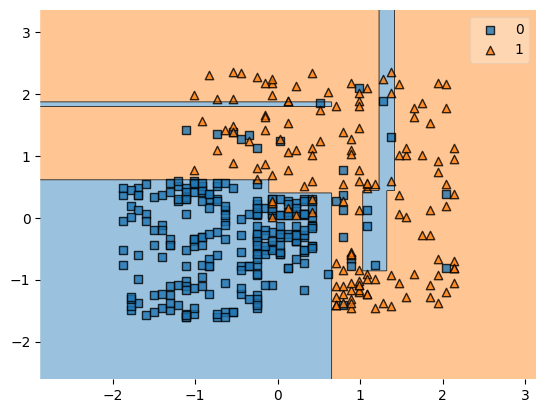

In [50]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=df1)

In [51]:
for i in range(1,20):
    dt2 =  DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train,y_train)
    print(dt2.score(x_train,y_train),dt2.score(x_test,y_test),i)

0.821875 0.9 1
0.91875 0.9125 2
0.91875 0.9125 3
0.93125 0.9125 4
0.934375 0.9 5
0.95 0.8625 6
0.96875 0.85 7
0.975 0.85 8
0.98125 0.85 9
0.984375 0.85 10
0.990625 0.8375 11
0.99375 0.8375 12
0.99375 0.8375 13
0.996875 0.8375 14
0.996875 0.8375 15
0.996875 0.8375 16
0.996875 0.8375 17
0.996875 0.8375 18
0.996875 0.8375 19


In [56]:
df2 = DecisionTreeClassifier(max_depth=3)
df2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [57]:
df2.score(x_test,y_test)

0.9125